<h1 style="text-align:center">KLASIFIKASI MULTI KELAS</h1> 

# Softmax

`softmax` kita pergunakan jika kelas yang kita klasifikasikan/kategorikan berjumlah di atas sama dengan 2 kelas. Berarti untuk klasifikasi dengan kelas berjumlah 3, 4, 5, dan seterusnya, kita wajib menggunakan `softmax`.

Apakah 2 kelas bisa juga kita pergunakanan `softmax` untuk activation-nya? Bisa. Selain menggunakan `sigmoid`, kita bisa menggunakan `softmax` juga untuk kasus-kasus klasifikasi biner/binary.

# Persiapan Data

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/LENOVO/Praktikum DL/Praktikum_DL/Pertemuan 3/Dataset/dataset_klasifikasi_multiclass.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.518347,0.169320,-0.563664,2.950641,-1.132146,1.505471,-0.284394,0.023092,0.007470,-1.650441,1
1,2.098640,2.220619,-0.125866,-1.202919,-1.711568,-0.426238,-0.890906,0.522722,-0.963621,1.113457,1
2,-1.995845,-1.483104,0.184418,-0.663577,0.833680,-0.825841,0.292764,-0.354294,0.668589,0.474721,2
3,0.902420,-1.210013,0.938864,0.901350,-1.298249,0.408745,0.344624,-0.322170,0.705360,2.597745,1
4,1.233222,0.890784,-0.642521,-1.183033,0.760037,-0.554282,-1.136154,0.233899,-0.503455,0.123104,3
...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.585161,-0.012898,0.841239,-0.050058,1.791464,-0.122988,-0.224938,0.026782,-0.138373,-2.426532,2
14996,1.755174,0.712462,0.583603,-0.477384,-1.014532,-0.424457,0.618902,0.159920,-0.271558,0.741435,1
14997,-0.111263,-2.167265,-0.814331,1.521100,1.871699,-0.034947,0.260475,-0.506794,0.924204,-1.455204,2
14998,-1.547969,-0.364428,-0.663746,-0.452525,0.467082,1.012672,0.254040,-0.082668,0.143094,-1.506516,2


# Membagi Dataset

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1).values
Y = df['y'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42, stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12000, 10), (3000, 10), (12000,), (3000,))

In [4]:
df['y'].value_counts()

y
3    3759
2    3750
0    3746
1    3745
Name: count, dtype: int64

# Membuat Arsitektur Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentroph', optimizer='adam', metrics=['accuracy'])

# Compile Model

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training Model

In [7]:
catatan = model.fit(x_train, y_train, validation_split=0.1, batch_size=256, epochs=100)

Epoch 1/100
43/43 [==============================] - 3s 16ms/step - loss: 1.3253 - accuracy: 0.4017 - val_loss: 1.2498 - val_accuracy: 0.4550
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 1.1207 - accuracy: 0.5364 - val_loss: 0.9740 - val_accuracy: 0.6525
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 0.8020 - accuracy: 0.7390 - val_loss: 0.6051 - val_accuracy: 0.8025
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 0.5101 - accuracy: 0.8343 - val_loss: 0.4571 - val_accuracy: 0.8550
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4261 - accuracy: 0.8674 - val_loss: 0.4202 - val_accuracy: 0.8675
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.3934 - accuracy: 0.8836 - val_loss: 0.4005 - val_accuracy: 0.8700
Epoch 7/100
43/43 [==============================] - 0s 5ms/step - loss: 0.3762 - accuracy: 0.8900 - val_loss: 0.3859 - val_accuracy: 0.8767
Epoch 8/100


Epoch 59/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.9168 - val_loss: 0.2952 - val_accuracy: 0.9033
Epoch 60/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.9161 - val_loss: 0.3008 - val_accuracy: 0.9033
Epoch 61/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2703 - accuracy: 0.9171 - val_loss: 0.2957 - val_accuracy: 0.9017
Epoch 62/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2676 - accuracy: 0.9183 - val_loss: 0.2927 - val_accuracy: 0.9067
Epoch 63/100
43/43 [==============================] - 0s 4ms/step - loss: 0.2694 - accuracy: 0.9172 - val_loss: 0.2972 - val_accuracy: 0.9025
Epoch 64/100
43/43 [==============================] - 0s 5ms/step - loss: 0.2687 - accuracy: 0.9175 - val_loss: 0.2991 - val_accuracy: 0.9017
Epoch 65/100
43/43 [==============================] - 0s 6ms/step - loss: 0.2683 - accuracy: 0.9184 - val_loss: 0.2952 - val_accuracy: 0.9033
Epoch 

# Plot Performa Model

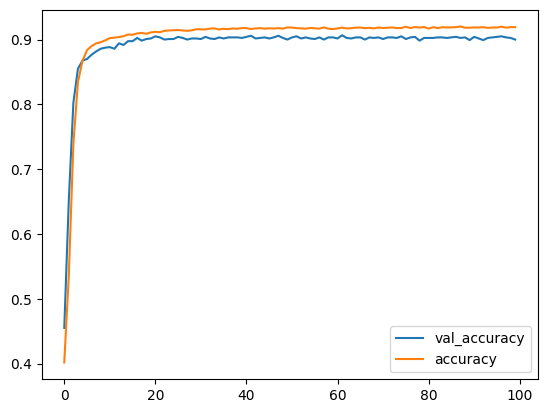

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(catatan.history['val_accuracy'])), catatan.history['val_accuracy'], label='val_accuracy')
plt.plot(range(len(catatan.history['accuracy'])), catatan.history['accuracy'], label='accuracy')
plt.legend()
plt.show()

# Evaluasi Model

In [9]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy Model : ', acc)

94/94 [==============================] - 0s 2ms/step - loss: 0.2798 - accuracy: 0.9097
Accuracy Model :  0.9096666574478149


In [ ]:
# accuracy score

# Prediksi Model

In [10]:
model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


array([[1.8581985e-02, 1.6979122e-03, 1.0685961e-02, 9.6903414e-01],
       [6.7625117e-01, 2.1322471e-01, 8.8466182e-02, 2.2057889e-02],
       [2.3832370e-04, 1.7222401e-03, 9.9372560e-01, 4.3138079e-03],
       ...,
       [9.7453475e-01, 1.4896565e-02, 8.9710215e-03, 1.5976104e-03],
       [9.6879822e-01, 1.6055917e-02, 1.1227243e-02, 3.9186496e-03],
       [1.8568350e-03, 9.9255669e-01, 4.2381058e-03, 1.3483799e-03]],
      dtype=float32)

Di sini, kita akan menggunakan fungsi spesial `np.argmax` untuk mengecek kelas dengan probabilitas tertinggi. Misal jika di antara 5 kelas, hasil prediksinya sebagai berikut,

`y_pred = [0.1, 0.3, 0.2, 0.8, 0.4]`

maka kita bisa pahami bahwa 

1. `kelas 0` memiliki probabilitas $10\%$,
2. `kelas 1` memiliki probabilitas $30\%$,
3. `kelas 2` memiliki probabilitas $20\%$, 
4. `kelas 3` memiliki probabilitas $80\%$, dan 
5. `kelas 4` memiliki probabilitas $40\%$.

Artinya `y_pred` kemungkinan besar termasuk kategori `kelas 3`, diikuti kemungkinan besar kedua, dia termasuk kategori `kelas 4`, dan seterusnya.

Nah, jika kita menggunakan `np.argmax`, maka `np.argmax(y_pred)` akan menghasilkan nilai `3`.

In [14]:
import numpy as np

pred = np.argmax(model.predict(x_test))

94/94 [==============================] - 0s 2ms/step


In [16]:
import numpy as np

y_pred = model.predict(x_test)
pred = np.argmax(y_pred, axis=1)
pred

94/94 [==============================] - 0s 2ms/step


array([3, 0, 2, ..., 0, 0, 1], dtype=int64)

# Evaluasi dengan Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred, y_test))

[[719  32  24  16]
 [  6 677  36   6]
 [  1  26 645  42]
 [ 23  14  45 688]]


# Simpan Model

Mentraining suatu model membutuhkan waktu yang tidak sedikit, maka dari itu penting kita untuk menyimpan model yang sudah kita training. Untuk menyimpan model, kita bisa pergunakan fungsi `.save_weights`.

In [24]:
model.save_weights('model.h5')

Jika sudah disimpan, maka anda bisa mendowload file `h5` ini, untuk kemudian anda pakai atau anda transfer kepada orang lain atau komputer untuk langsung anda pergunakan untuk memprediksi sesuatu, atau juga anda bisa lakukan melanjutkan training pada otak yang sudah anda buat.

Untuk meload file `h5` ini, anda perlu menyiapkan 

1. Kerangka otak yang anda buat,
2. Compile kerangka otak anda,
3. Load file `h5` anda menggunakan `.load_weights`.